In [1]:
import numpy as np

fruits = np.load('fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [2]:
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
pca.fit(fruits_2d)

PCA(n_components=50)

In [3]:
pca.components_.shape

(50, 10000)

In [4]:
import matplotlib.pyplot as plt

def draw_fruits(arr, ratio=1):
    n = len(arr)

    rows = int(np.ceil(n/10))

    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols, figsize=(cols*ratio, rows*ratio), squeeze=False)

    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:
                axs[i, j].imshow(arr[i*10+j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

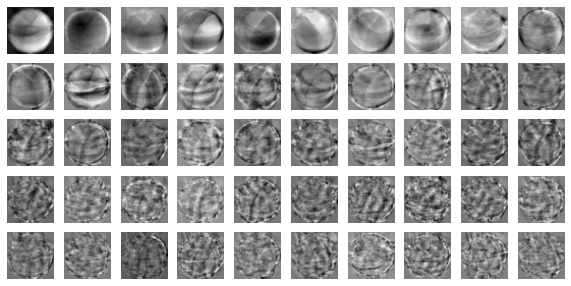

In [5]:
draw_fruits(pca.components_.reshape(-1, 100, 100))

In [6]:
fruits_2d.shape

(300, 10000)

In [7]:
fruits_pca = pca.transform(fruits_2d)
fruits_pca.shape

(300, 50)

In [8]:
fruits_inverse = pca.inverse_transform(fruits_pca)
fruits_inverse.shape

(300, 10000)

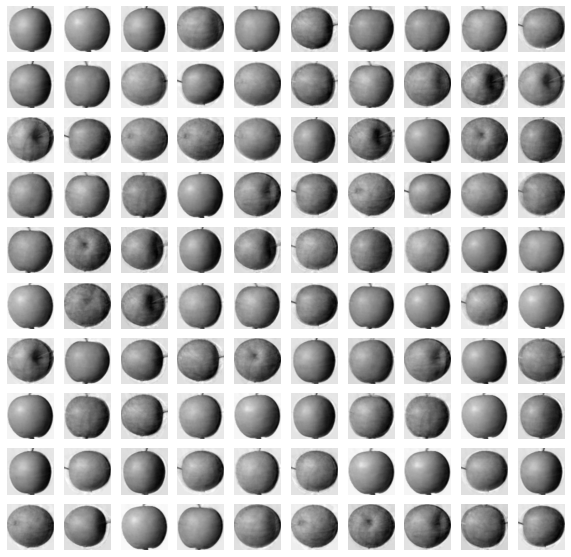

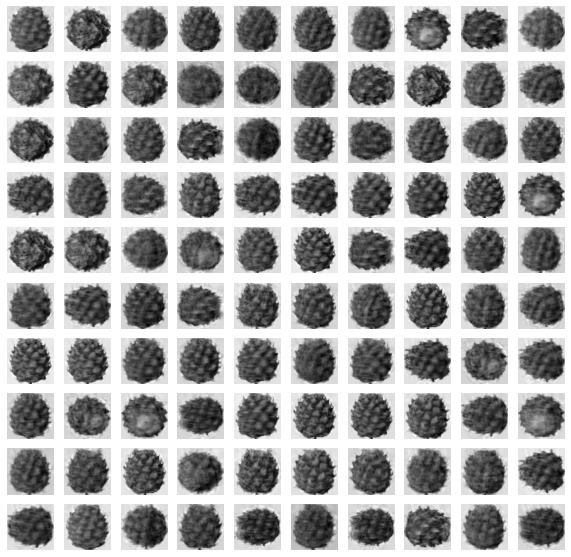

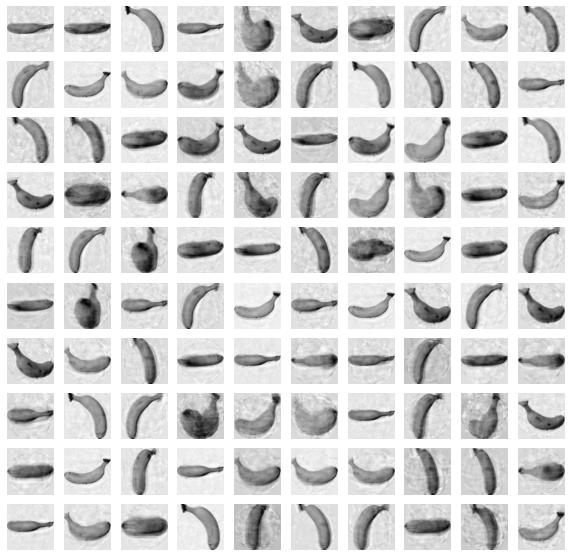

In [9]:
fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)

for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start + 100])
    print('\n')

In [10]:
print(np.sum(pca.explained_variance_ratio_))

0.9215627861991866


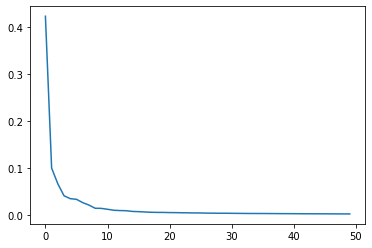

In [11]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

In [13]:
target = np.array([0] * 100 + [1] * 100 + [2] * 100)

In [15]:
from sklearn.model_selection import cross_validate

scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
0.35781326293945315


In [16]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.02099952697753906


In [17]:
pca = PCA(n_components=0.5)
pca.fit(fruits_2d)

PCA(n_components=0.5)

In [18]:
pca.n_components_

2

In [19]:
fruits_pca = pca.transform(fruits_2d)

In [20]:
fruits_pca.shape

(300, 2)

In [21]:
scores = cross_validate(lr, fruits_pca, target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9933333333333334
0.031008577346801756


C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sanghui\miniconda3\envs\ds_study\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

In [22]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_pca)
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([110,  99,  91], dtype=int64))


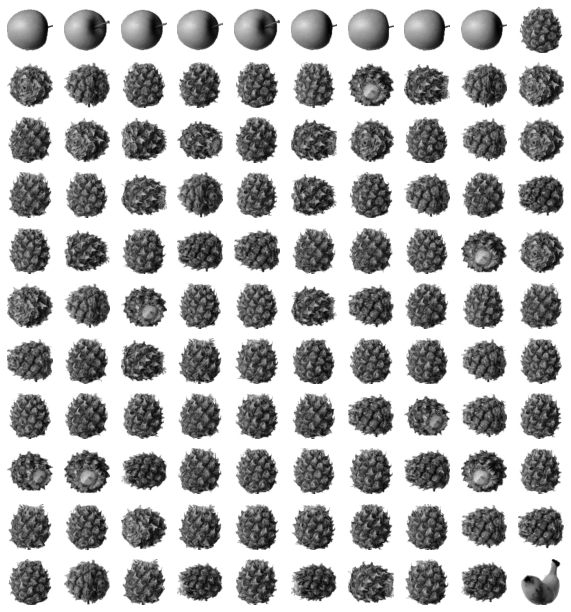

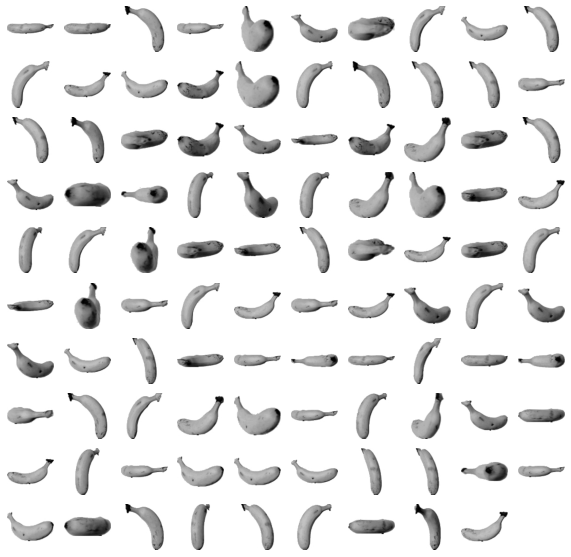

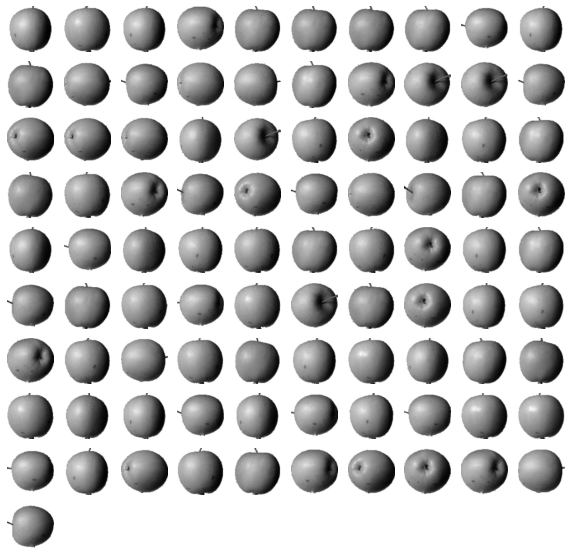

In [23]:
for label in range(3):
    draw_fruits(fruits[km.labels_ == label])
    print('\n')

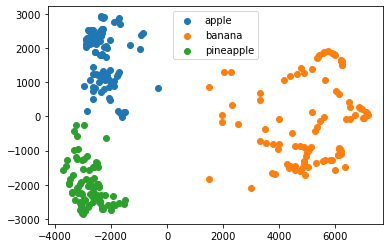

In [26]:
for label in range(3):
    data = fruits_pca[km.labels_ == label]
    plt.scatter(data[:,0], data[:, 1])
plt.legend(['apple', 'banana', 'pineapple'])
plt.show()

In [ ]:
- 차원 축소는 원본 데이터의 특성을 적은 수의 새로운 특성으로 변환하는 비지도 학습의 한 종류이다. 차원축소는 저장 공간을 줄이고 시각화하기 쉽다. 또한 다른 알고리즘의 성능을 높일 수 있다.
- 주성분 분석은 차원 축소 알고리즘의 하나로 데이터에서 가장 분산이 큰 방향을 찾는 방법이다. 이런 방향을 주성분이라고 부른다. 원본 데이터를 주성분에 투영하여 새로운 특성을 만들수 있다.
- 설명된 분산은 주성분 분석에서 주성분이 얼마나 원본 데이터의 분산을 잘 나타내는지 기록한것이다.